In [219]:
import numpy as np
import matplotlib.pyplot as plt

# Импортируем библиотеку для работы с электронными таблицами pandas
import pandas as pd

# Импортируем необходимые нам модули библиотеки машинного обучения sklearn  
from sklearn.model_selection import train_test_split # модуль разбиения на данные для обучения и для проверки
from sklearn.preprocessing import MinMaxScaler # модуль для кодирования матрицы признаков

from sklearn.linear_model import LinearRegression # модуль для обучения методом линейной регрессии
from sklearn.neural_network import MLPRegressor # модуль для обучения с помощью нейронной сети

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # методы оценки ошибки модели




In [220]:
df = pd.read_csv('../data/mech_properties.csv') 

In [221]:
# посмотрим что получилось
df.head(10)

,Standard,SteelGrade,"wt_C, %","wt_Si, %","wt_Mn, %","wt_P, %","wt_S, %","wt_V, %","wt_Nb, %","wt_Ti, %","wt_Al, %","wt_B, %","wt_Cr, %","wt_Ni, %","wt_Cu, %","wt_As, %",YieldStress,TensileStrength,Elongation
0,ГОСТ 1050-2013,05кп,0.0510,0.0255,0.3400,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.0850,0.255,0.255,0,0.0,0.0,0.0
1,ГОСТ 1050-2013,08кп,0.1095,0.0255,0.4625,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.0850,0.255,0.255,0,0.0,0.0,0.0
2,ГОСТ 1050-2013,08пс,0.1010,0.1520,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.0850,0.255,0.255,0,0.0,0.0,0.0
3,ГОСТ 1050-2013,08,0.1095,0.3400,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.0850,0.255,0.255,0,215.6,352.0,36.3
4,ГОСТ 1050-2013,10кп,0.1295,0.0595,0.4625,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.1275,0.255,0.255,0,0.0,0.0,0.0
5,ГОСТ 1050-2013,10пс,0.1295,0.1520,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.1275,0.255,0.255,0,0.0,0.0,0.0
6,ГОСТ 1050-2013,10,0.1295,0.3400,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.1275,0.255,0.255,0,225.5,363.0,34.1
7,ГОСТ 1050-2013,11кп,0.1095,0.0510,0.4700,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.1275,0.255,0.255,0,0.0,0.0,0.0
8,ГОСТ 1050-2013,15кп,0.1795,0.0595,0.4625,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.2125,0.255,0.255,0,0.0,0.0,0.0
9,ГОСТ 1050-2013,15пс,0.1795,0.1520,0.6050,0.0255,0.02975,0.0,0.0,0.0,0.0,0.0,0.2125,0.255,0.255,0,0.0,0.0,0.0


In [222]:
# если нам нужно посмотреть значение конкретной ячейки
print (df['YieldStress'].iloc[3])

215.6


In [223]:
# посмотрим на размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (182, 19)


In [224]:
# Удаляем все лишние столбцы
df.drop(columns=['Standard', 'SteelGrade', 'TensileStrength', 'Elongation'], inplace=True) 
# посмотрим на новый размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (182, 15)


In [225]:
# удаляем все строки, где предел текучести (YieldStress) равен нулю
df.drop(df[df['YieldStress'] == 0].index, inplace=True)
# удаляем все столбцы, где все все значения массовой доли элемента равны 0 (в данном примере это wt_As)
df = df.loc[:, (df != 0).any(axis=0)]
# Перегружаем индексы
df.reset_index(drop=True, inplace=True)
# посмотрим на новый размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (170, 14)


In [226]:
# Проверяем есть ли в таблице повторения
df.duplicated().sum()

np.int64(2)

In [227]:
# Удалим все дупликаты
df = df.drop_duplicates()
# посмотрим на новый размер массива
print (f'Размер массива: {df.shape}')

Размер массива: (168, 14)


In [228]:
# Проверяем, что все значения определены, пусть даже они нулевые
df.isna().sum()

wt_C, %        0
wt_Si, %       0
wt_Mn, %       0
wt_P, %        0
wt_S, %        0
wt_V, %        0
wt_Nb, %       0
wt_Ti, %       0
wt_Al, %       0
wt_B, %        0
wt_Cr, %       0
wt_Ni, %       0
wt_Cu, %       0
YieldStress    0
dtype: int64

In [229]:
# Резюме по данным
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"wt_C, %",168.0,0.164265,0.141606,0.0085,0.08500,0.11900,0.195500,0.78800
"wt_Si, %",168.0,0.515378,0.329870,0.0000,0.34000,0.42500,0.541875,1.87000
"wt_Mn, %",168.0,1.240789,0.659906,0.1700,0.60500,1.19000,1.740000,2.55000
"wt_P, %",168.0,0.047180,0.025196,0.0000,0.02550,0.04250,0.068000,0.10200
"wt_S, %",168.0,0.021554,0.009320,0.0000,0.01275,0.02125,0.029750,0.03825
"wt_V, %",168.0,0.017304,0.052364,0.0000,0.00000,0.00000,0.000000,0.25500
"wt_Nb, %",168.0,0.033893,0.037609,0.0000,0.00000,0.00000,0.076500,0.09000
"wt_Ti, %",168.0,0.067318,0.075841,0.0000,0.00000,0.07000,0.102000,0.25500
"wt_Al, %",168.0,0.306946,0.563283,0.0000,0.00000,0.01725,0.108500,1.70225
"wt_B, %",168.0,0.001629,0.003883,0.0000,0.00000,0.00000,0.004250,0.04250


In [230]:
# Анализ уникальности данных для каждого столбца
df.nunique()

wt_C, %         43
wt_Si, %        14
wt_Mn, %        30
wt_P, %         15
wt_S, %          9
wt_V, %          5
wt_Nb, %        10
wt_Ti, %        10
wt_Al, %        13
wt_B, %          5
wt_Cr, %        11
wt_Ni, %         2
wt_Cu, %         3
YieldStress    113
dtype: int64

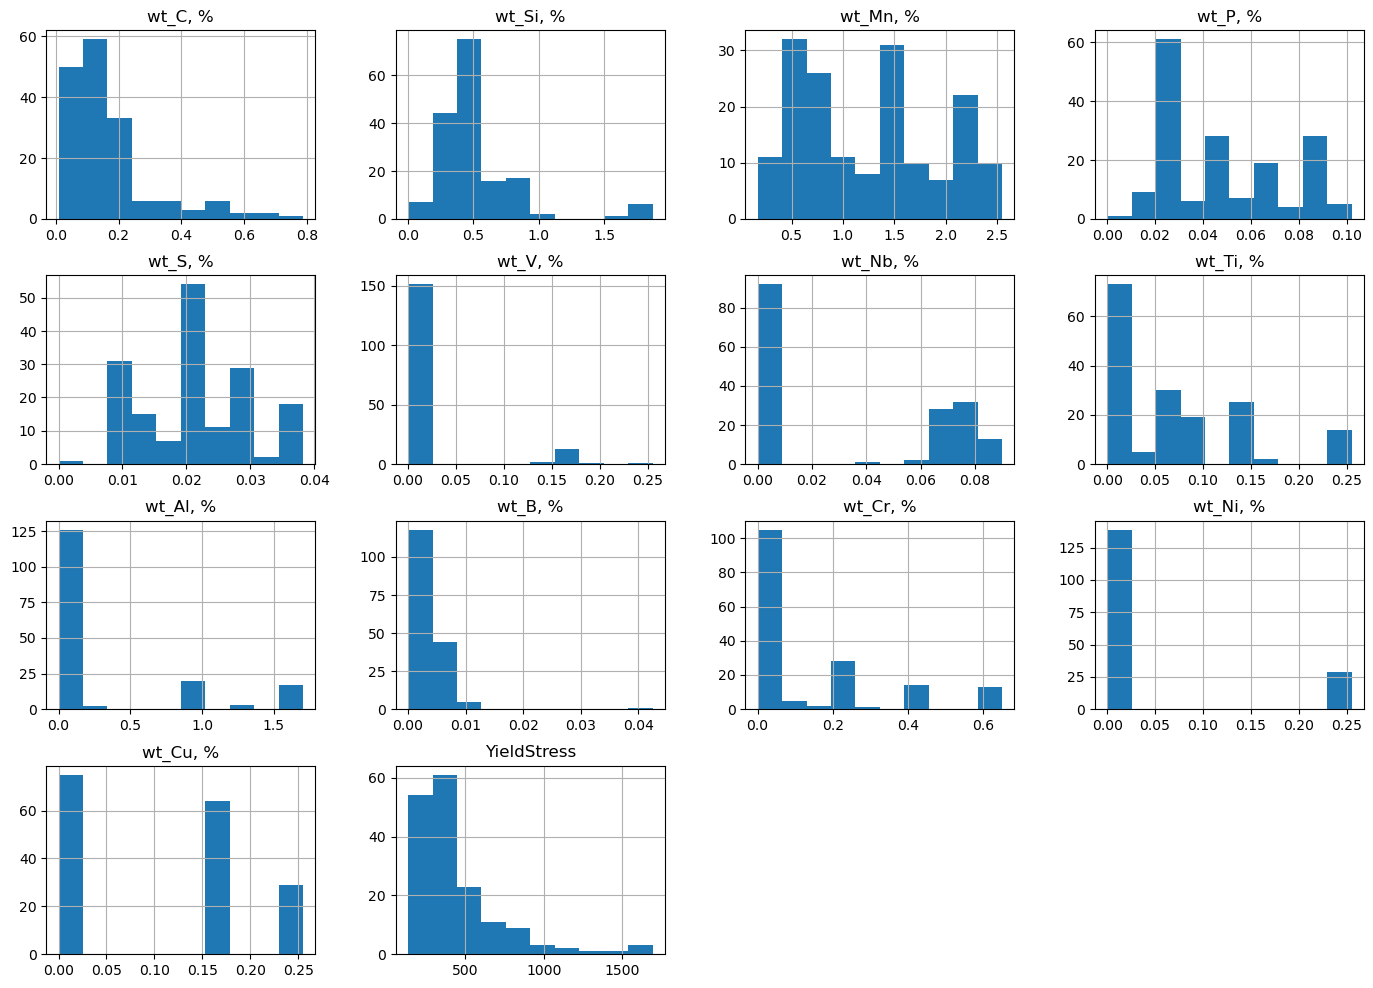

In [231]:
df.hist(figsize=(17,12));

In [232]:
# Корреляция предела текучести от содержания того или иного элемента
df.corrwith(df["YieldStress"])

wt_C, %        0.264999
wt_Si, %       0.465602
wt_Mn, %       0.586090
wt_P, %       -0.217411
wt_S, %       -0.433448
wt_V, %        0.142243
wt_Nb, %       0.282095
wt_Ti, %      -0.167620
wt_Al, %       0.315167
wt_B, %        0.469471
wt_Cr, %       0.502105
wt_Ni, %      -0.130988
wt_Cu, %       0.161161
YieldStress    1.000000
dtype: float64

In [233]:
# Разбиваем данные на признаки и целевую функцию
X = df.drop(columns=['YieldStress']) # Удаляем не нужный столбец с пределом текучести
y = df['YieldStress'] # целевая функция - столбец с пределом текучести

In [234]:
# Посмотрим на X
X.tail(10) # конец массива

,"wt_C, %","wt_Si, %","wt_Mn, %","wt_P, %","wt_S, %","wt_V, %","wt_Nb, %","wt_Ti, %","wt_Al, %","wt_B, %","wt_Cr, %","wt_Ni, %","wt_Cu, %"
159,0.1955,0.425,1.870,0.0170,0.02125,0.0,0.0700,0.0700,0.01150,0.00850,0.4500,0.0,0.17
160,0.2380,0.850,1.870,0.0170,0.02125,0.0,0.0700,0.0700,0.01150,0.00850,0.4500,0.0,0.17
161,0.2550,0.850,2.125,0.0170,0.02125,0.0,0.0700,0.0700,0.01150,0.00850,0.4500,0.0,0.17
162,0.2975,0.850,2.550,0.0170,0.02125,0.0,0.0700,0.0700,0.01150,0.00850,0.4500,0.0,0.17
163,0.0850,0.051,0.510,0.0255,0.02125,0.0,0.0680,0.1275,0.17225,0.00085,0.0000,0.0,0.17
164,0.0850,0.425,1.445,0.0255,0.02125,0.0,0.0850,0.0765,0.17225,0.00085,0.1700,0.0,0.17
165,0.0850,0.510,1.530,0.0255,0.00850,0.0,0.0850,0.0425,0.08650,0.00425,0.1700,0.0,0.17
166,0.2125,0.340,1.190,0.0255,0.00850,0.0,0.0085,0.0425,0.08650,0.00425,0.2975,0.0,0.17
167,0.3060,0.680,0.680,0.0255,0.00850,0.0,0.0625,0.0595,0.05250,0.00425,0.4250,0.0,0.17
168,0.3060,0.680,0.935,0.0255,0.00850,0.0,0.0595,0.0595,0.05250,0.00425,0.2125,0.0,0.17


In [235]:
# Посмотрим на y
y.iloc[75:85] # выводим середину массива (точнее объекта pd.series)

75    835.0
76    190.0
77    223.7
78    210.0
79    225.0
80    234.0
81    254.0
82    282.0
83    266.0
84    328.0
Name: YieldStress, dtype: float64

In [236]:
# разбиваем данные на данные для обучения и данные для проверки модели
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=random_state)

# Переводим признаки в кодированный масштаб
scaler = MinMaxScaler(feature_range=(-1, 1)) # создаем объект класса MinMaxScaler 
X_train_scaled = scaler.fit_transform(X_train) # нормализуем массив признаков для обучения
X_test_scaled = scaler.transform(X_test) # нормализыем массив признаков для проверки модели

In [237]:
# Посмотрим на массив признаков для обучения
X_train.head(10)

,"wt_C, %","wt_Si, %","wt_Mn, %","wt_P, %","wt_S, %","wt_V, %","wt_Nb, %","wt_Ti, %","wt_Al, %","wt_B, %","wt_Cr, %","wt_Ni, %","wt_Cu, %"
109,0.0850,0.425,0.850,0.06800,0.02550,0.000,0.0850,0.1275,0.01725,0.00000,0.0000,0.000,0.170
75,0.2125,0.680,2.295,0.06800,0.01275,0.255,0.0000,0.0000,1.70225,0.00425,0.0000,0.000,0.000
108,0.0085,0.425,0.170,0.01700,0.01700,0.000,0.0000,0.1700,0.01150,0.00000,0.0000,0.000,0.170
19,0.3880,0.340,0.955,0.02550,0.02975,0.000,0.0000,0.0000,0.00000,0.00000,0.2550,0.255,0.255
16,0.2295,0.340,0.955,0.02550,0.02975,0.000,0.0000,0.0000,0.00000,0.00000,0.2550,0.255,0.255
31,0.0680,0.425,0.595,0.07225,0.02550,0.000,0.0000,0.0000,0.01725,0.00000,0.0000,0.000,0.000
18,0.3380,0.340,0.955,0.02550,0.02975,0.000,0.0000,0.0000,0.00000,0.00000,0.2550,0.255,0.255
12,0.6380,0.340,0.755,0.02550,0.02975,0.000,0.0000,0.0000,0.00000,0.00000,0.2125,0.255,0.255
9,0.5380,0.340,0.755,0.02550,0.02975,0.000,0.0000,0.0000,0.00000,0.00000,0.2125,0.255,0.255
82,0.0935,0.425,0.850,0.02550,0.02125,0.000,0.0765,0.1275,0.01725,0.00000,0.0000,0.000,0.000


In [238]:
# Массив X_train_scaled уже не является объектом класса pandas dataframe, это уже NumPy array.
# Так что его можем вывести просто задав диапазон
X_train_scaled[:11, :]

array([[-0.80372033, -0.54545455, -0.42857143,  0.33333333,  0.33333333,
        -1.        ,  0.88888889,  0.        , -0.97973271, -1.        ,
        -1.        , -1.        ,  0.33333333],
       [-0.47658756, -0.27272727,  0.78571429,  0.33333333, -0.33333333,
         1.        , -1.        , -1.        ,  1.        , -0.8       ,
        -1.        , -1.        , -1.        ],
       [-1.        , -0.54545455, -1.        , -0.66666667, -0.11111111,
        -1.        , -1.        ,  0.33333333, -0.98648847, -1.        ,
        -1.        , -1.        ,  0.33333333],
       [-0.02629891, -0.63636364, -0.34033613, -0.5       ,  0.55555556,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.21538462,  1.        ,  1.        ],
       [-0.43296985, -0.63636364, -0.34033613, -0.5       ,  0.55555556,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.21538462,  1.        ,  1.        ],
       [-0.84733804, -0.545454

In [239]:
# обучение по данным для обучения моделью линейной регрессии
regr = LinearRegression(fit_intercept = True) # создаем объект класса линейная регрессия с расчетом свободного коэффициента
regr.fit(X_train_scaled, y_train) # наполняем модель данными для обучения

# Расчитываем отклик по данным для проверки
y_pred = regr.predict(X_test_scaled)

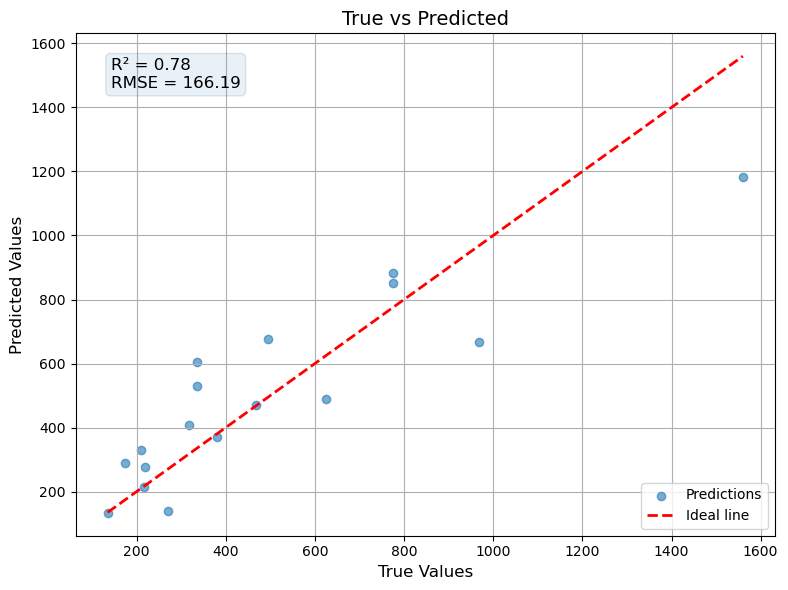

In [240]:
# Функция для сравнения тестовых и предсказанных значений
def plot_true_vs_predicted(y_true, y_pred, title="True vs Predicted", figsize=(8, 6)):
    """
    Строит график истинных значений vs предсказанных.
    
    Параметры:
        y_true (array-like): Истинные значения
        y_pred (array-like): Предсказанные значения
        title (str): Заголовок графика
        figsize (tuple): Размер графика
    """
    # Вычисляем метрики
    r2 = r2_score(y_true, y_pred) # коэффициент детерминации
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) #  среднеквадратическая ошибка

    # Строим график
    plt.figure(figsize=figsize)
    plt.scatter(y_true, y_pred, alpha=0.6, label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2, label='Ideal line')

    # Добавляем метрики на график
    metrics_text = f'R² = {r2:.2f}\nRMSE = {rmse:.2f}'
    plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.1))

    # Оформление графика
    plt.title(title, fontsize=14)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_true_vs_predicted (y_test, y_pred)

In [244]:
# Создаём нейросеть
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),   # два скрытых слоя: 64 и 32 нейрона (попробуйте (128, 64, 32))
    activation='relu', # возможные варианты ['relu', 'tanh', 'logistic', 'identity']
    solver='adam', # возможные варианты ['adam', 'sgd', 'lbfgs', ]
    max_iter=10000,
    random_state=random_state,
    early_stopping=True,           # остановка при отсутствии улучшения
    validation_fraction=0.1        # часть данных для валидации
)

# Обучение
mlp.fit(X_train_scaled, y_train)


print(f'Количество итераций: {len(mlp.validation_scores_)}, последний R² = {mlp.validation_scores_[-1]:2f}')  

Количество итераций: 1253, последний R² = 0.788605


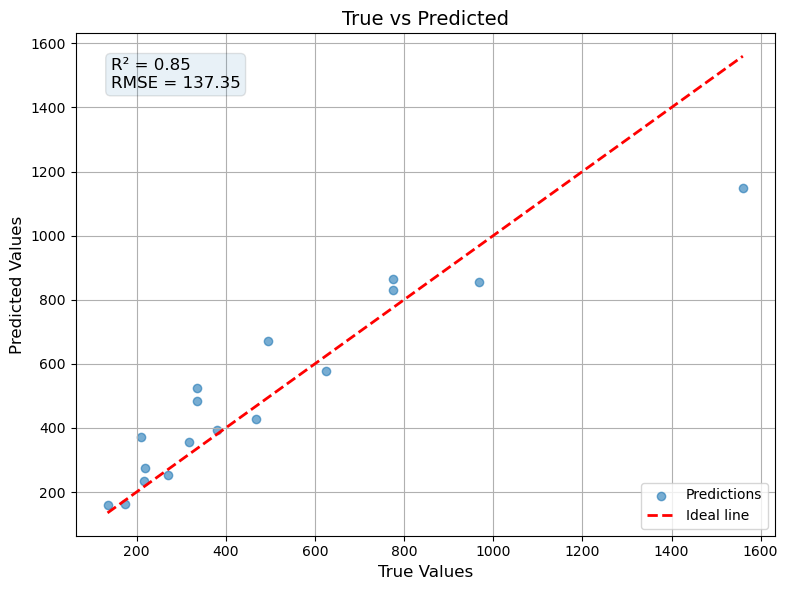

In [245]:
# Расчитываем отклик по данным для проверки
y_pred = mlp.predict(X_test_scaled)
# посмотрим на результат
plot_true_vs_predicted (y_test, y_pred)